In [106]:
##OBSERVATIONS:
#1.No missing values in the data set
#2.Females are more than the men in the dataset
#3.People who are single are higher in the Marriage Category
#4 Mjaorly people have done University level in their education

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [107]:
import pandas as pd

In [108]:
#data ingestion step
df=pd.read_csv('data.csv')

In [109]:
##Dropping the header
df.columns=df.loc[0]
df.drop(0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [110]:
#dropping the ID column
df=df.drop(labels=['ID'],axis=1)

In [111]:
#Check for duplicated records
df.duplicated().sum()

35

In [112]:
#dropped the duplicates
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [113]:
#dropping the 0th index which was a repetitive of heading row
df=df.drop(df.index[0])

In [114]:
#Typecasting to integer
df['LIMIT_BAL'] = df['LIMIT_BAL'].astype(int)

In [115]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [116]:
for col_name in ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']:
    df[col_name] = df[col_name].astype(int)

In [117]:
#Typecasting to integer
for col_name in ['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']:
    df[col_name] = df[col_name].astype(int)

In [118]:
df['AGE']=df['AGE'].astype(int)

In [119]:
#Checking for null values
df.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [120]:
#Unique items
#Gender (1 = male; 2 = female)
df['SEX'].unique()

array(['2', '1'], dtype=object)

In [121]:
#Value count
df['SEX'].value_counts()

SEX
2    18091
1    11874
Name: count, dtype: int64

In [122]:
#Check if numeric
df.SEX.str.isnumeric()

1        True
2        True
3        True
4        True
5        True
         ... 
29996    True
29997    True
29998    True
29999    True
30000    True
Name: SEX, Length: 29965, dtype: bool

In [123]:
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
df['EDUCATION'].unique()

array(['2', '1', '3', '5', '4', '6', '0'], dtype=object)

In [124]:
df['EDUCATION'].value_counts()

EDUCATION
2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [125]:
df.EDUCATION.str.isnumeric()

1        True
2        True
3        True
4        True
5        True
         ... 
29996    True
29997    True
29998    True
29999    True
30000    True
Name: EDUCATION, Length: 29965, dtype: bool

In [126]:
#Marital status (1 = married; 2 = single; 3 = others)
df['MARRIAGE'].unique()

array(['1', '2', '3', '0'], dtype=object)

In [127]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15945
1    13643
3      323
0       54
Name: count, dtype: int64

In [128]:
df.MARRIAGE.str.isnumeric()

1        True
2        True
3        True
4        True
5        True
         ... 
29996    True
29997    True
29998    True
29999    True
30000    True
Name: MARRIAGE, Length: 29965, dtype: bool

In [129]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [134]:
#Changing the values mentioned
df['SEX'] = df['SEX'].apply(lambda x: 'Male' if x == '1' else x)

In [135]:
df['SEX'] = df['SEX'].apply(lambda x: 'Female' if x == '2' else x)

In [136]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,Female,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Female,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [137]:
#Changing the values as per the specifications given,for 0 we have assumed that they are not educated
education_mapping = {
    '1': 'Graduate School',
    '2': 'University',
    '3': 'High School',
    '4': 'Others',
    '0': 'Others'
}
for index,row in df.iterrows():
    df.at[index, 'EDUCATION'] = education_mapping.get(row['EDUCATION'])

In [138]:
df['EDUCATION'].value_counts()

EDUCATION
University         14019
Graduate School    10563
High School         4915
Others               137
Name: count, dtype: int64

In [139]:
#Changing the values as per the specifications given,for 0 we have assumed that they fall under others
marriage_mapping = {
    '1': 'Married',
    '2': 'Single',
    '3': 'Others',
    '0': 'Others'
}
for index,row in df.iterrows():
    df.at[index, 'MARRIAGE'] = marriage_mapping.get(row['MARRIAGE'])


In [140]:
#There is no specification given for 0 so we assume that 0 here means that it has been paid duly
#-2 was not defined, hence to be on the conservative side we have taken -2 to be delay for 2 months
pay0_mapping = {
    '-1': 'Pay duly',
    '1': 'Payment delay for one month',
    '2': 'Payment delay for two months',
    '-2':'Payment delay for two months',
    '3':'Payment delay for three months',
    '4':'Payment delay for four months',
    '5':'Payment delay for five months',
    '6':'Payment delay for six months',
    '7':'Payment delay for seven months',
    '8':'Payment delay for eight months',
    '0':'Pay duly'
}
for index,row in df.iterrows():
    df.at[index, 'PAY_0'] = pay0_mapping.get(row['PAY_0'])

In [141]:
#There is no specification given for 0 so we assume that 0 here means that it has been paid duly
#-2 was not defined, hence to be on the conservative side we have taken -2 to be delay for 2 months
pay2_mapping = {
    '-1': 'Pay duly',
    '1': 'Payment delay for one month',
    '2': 'Payment delay for two months',
    '-2':'Payment delay for two months',
    '3':'Payment delay for three months',
    '4':'Payment delay for four months',
    '5':'Payment delay for five months',
    '6':'Payment delay for six months',
    '7':'Payment delay for seven months',
    '8':'Payment delay for eight months',
    '0':'Pay duly'
}
for index,row in df.iterrows():
    df.at[index, 'PAY_2'] = pay0_mapping.get(row['PAY_2'])

In [142]:
#There is no specification given for 0 so we assume that 0 here means that it has been paid duly
#-2 was not defined, hence to be on the conservative side we have taken -2 to be delay for 2 months
pay0_mapping = {
    '-1': 'Pay duly',
    '1': 'Payment delay for one month',
    '2': 'Payment delay for two months',
    '-2':'Payment delay for two months',
    '3':'Payment delay for three months',
    '4':'Payment delay for four months',
    '5':'Payment delay for five months',
    '6':'Payment delay for six months',
    '7':'Payment delay for seven months',
    '8':'Payment delay for eight months',
    '0':'Pay duly'
}
for index,row in df.iterrows():
    df.at[index, 'PAY_3'] = pay0_mapping.get(row['PAY_3'])

In [143]:
#There is no specification given for 0 so we assume that 0 here means that it has been paid duly
#-2 was not defined, hence to be on the conservative side we have taken -2 to be delay for 2 months
pay0_mapping = {
    '-1': 'Pay duly',
    '1': 'Payment delay for one month',
    '2': 'Payment delay for two months',
    '-2':'Payment delay for two months',
    '3':'Payment delay for three months',
    '4':'Payment delay for four months',
    '5':'Payment delay for five months',
    '6':'Payment delay for six months',
    '7':'Payment delay for seven months',
    '8':'Payment delay for eight months',
    '0':'Pay duly'
}
for index,row in df.iterrows():
    df.at[index, 'PAY_4'] = pay0_mapping.get(row['PAY_4'])

In [144]:
#There is no specification given for 0 so we assume that 0 here means that it has been paid duly
#-2 was not defined, hence to be on the conservative side we have taken -2 to be delay for 2 months
pay0_mapping = {
    '-1': 'Pay duly',
    '1': 'Payment delay for one month',
    '2': 'Payment delay for two months',
    '-2':'Payment delay for two months',
    '3':'Payment delay for three months',
    '4':'Payment delay for four months',
    '5':'Payment delay for five months',
    '6':'Payment delay for six months',
    '7':'Payment delay for seven months',
    '8':'Payment delay for eight months',
    '0':'Pay duly'
}
for index,row in df.iterrows():
    df.at[index, 'PAY_5'] = pay0_mapping.get(row['PAY_5'])

In [145]:
#There is no specification given for 0 so we assume that 0 here means that it has been paid duly
#-2 was not defined, hence to be on the conservative side we have taken -2 to be delay for 2 months
pay0_mapping = {
    '-1': 'Pay duly',
    '1': 'Payment delay for one month',
    '2': 'Payment delay for two months',
    '-2':'Payment delay for two months',
    '3':'Payment delay for three months',
    '4':'Payment delay for four months',
    '5':'Payment delay for five months',
    '6':'Payment delay for six months',
    '7':'Payment delay for seven months',
    '8':'Payment delay for eight months',
    '0':'Pay duly'
}
for index,row in df.iterrows():
    df.at[index, 'PAY_6'] = pay0_mapping.get(row['PAY_6'])

In [146]:
df['default payment next month'].unique()

array(['1', '0'], dtype=object)

In [147]:
df = df.rename(columns={'BILL_AMT1': 'Amount of bill statement in September, 2005', 'BILL_AMT2': 'Amount of bill statement in August, 2005', 'BILL_AMT3': 'Amount of bill statement in July, 2005'})
    

In [148]:
df = df.rename(columns={'BILL_AMT4': 'Amount of bill statement in June, 2005', 'BILL_AMT5':'Amount of bill statement in May, 2005','BILL_AMT6':'Amount of bill statement in April, 2005'})

In [149]:
df = df.rename(columns={'PAY_AMT1': 'Amount paid in September, 2005', 'PAY_AMT2': 'Amount paid in August, 2005', 'PAY_AMT3': 'Amount paid in July, 2005','PAY_AMT4': 'Amount paid in June, 2005','PAY_AMT5': 'Amount paid in May, 2005','PAY_AMT6': 'Amount paid in April, 2005'})

In [150]:
#Changing the names of the columns as per the scpecification
df = df.rename(columns={'PAY_0': 'The repayment status in September, 2005', 'PAY_2': 'The repayment status in August, 2005', 'PAY_3': 'The repayment status in July, 2005','PAY_4': 'The repayment status in June, 2005','PAY_5': 'The repayment status in May, 2005','PAY_6': 'The repayment status in April, 2005'})

In [151]:
defpay_mapping = {
    '1': 'Yes',
    '0': 'No',
    
}
for index,row in df.iterrows():
    df.at[index, 'default payment next month'] = defpay_mapping.get(row['default payment next month'])


In [152]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

<Axes: xlabel='EDUCATION', ylabel='count'>

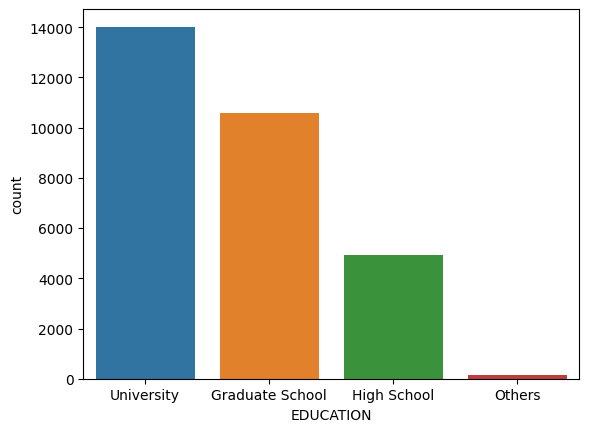

In [153]:
sns.countplot(x=df['EDUCATION'])

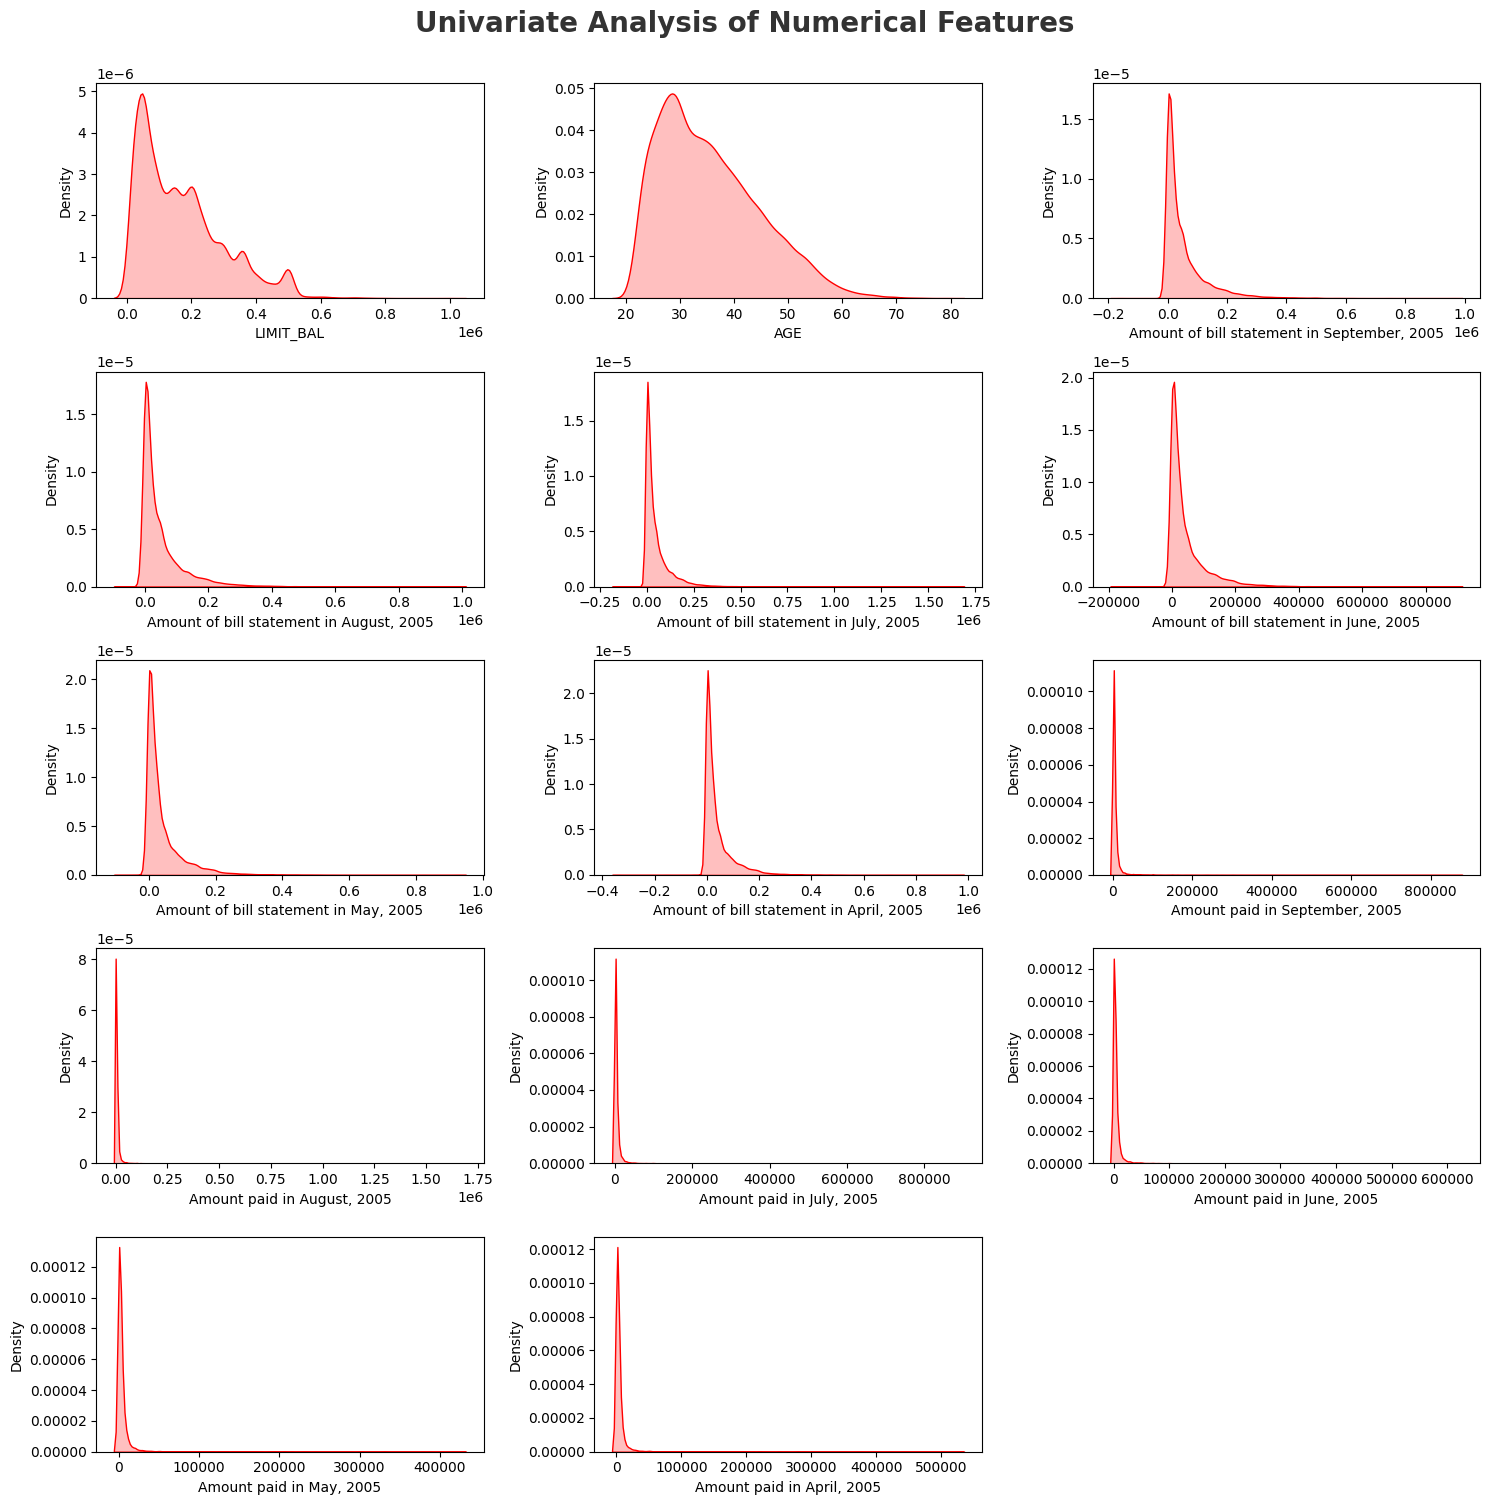

In [154]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

<Axes: ylabel='count'>

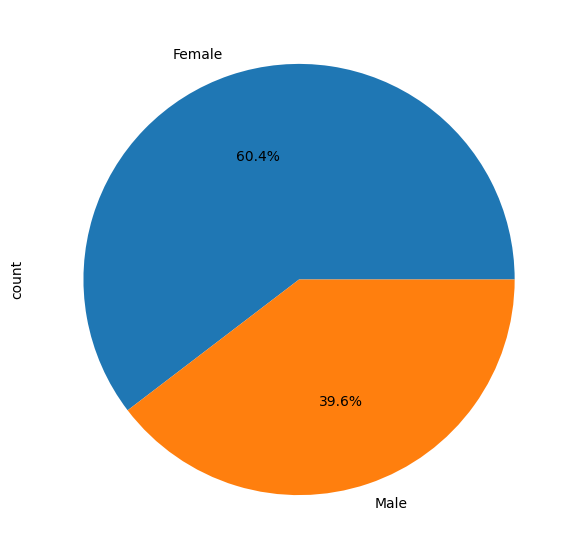

In [155]:
df["SEX"].value_counts().plot.pie(y=df["SEX"],figsize=(7,7),autopct='%1.1f%%')

<Axes: ylabel='count'>

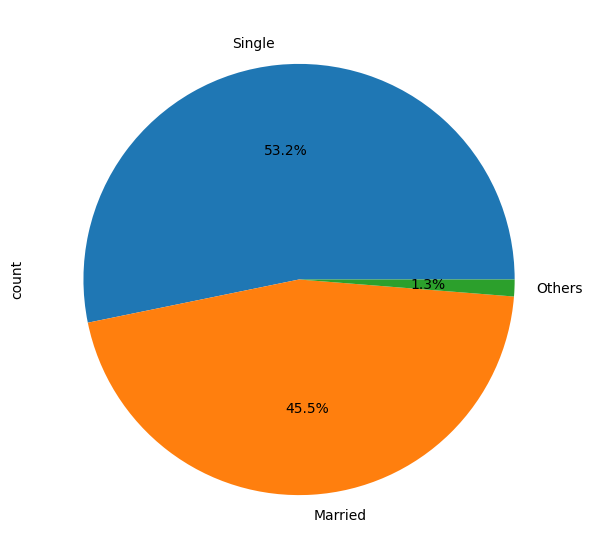

In [156]:
df["MARRIAGE"].value_counts().plot.pie(y=df["MARRIAGE"],figsize=(7,7),autopct='%1.1f%%')

<Axes: ylabel='count'>

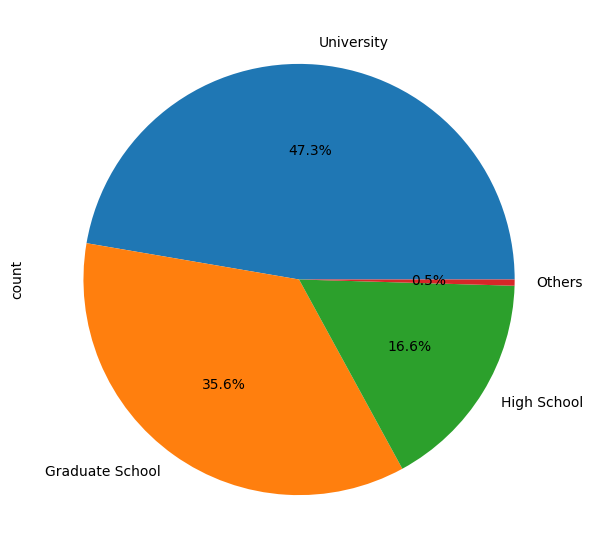

In [157]:
df["EDUCATION"].value_counts().plot.pie(y=df["EDUCATION"],figsize=(7,7),autopct='%1.1f%%')

In [158]:
df['Amount paid in September, 2005'].value_counts()

Amount paid in September, 2005
0        5218
2000     1363
3000      891
5000      698
1500      507
         ... 
3391        1
7785        1
66022       1
10121       1
85900       1
Name: count, Length: 7943, dtype: int64

In [159]:
df=df.reset_index()

In [160]:
df=df.drop(labels=['index'],axis=1)

In [161]:
categorical_features

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'The repayment status in September, 2005',
 'The repayment status in August, 2005',
 'The repayment status in July, 2005',
 'The repayment status in June, 2005',
 'The repayment status in May, 2005',
 'The repayment status in April, 2005',
 'default payment next month']

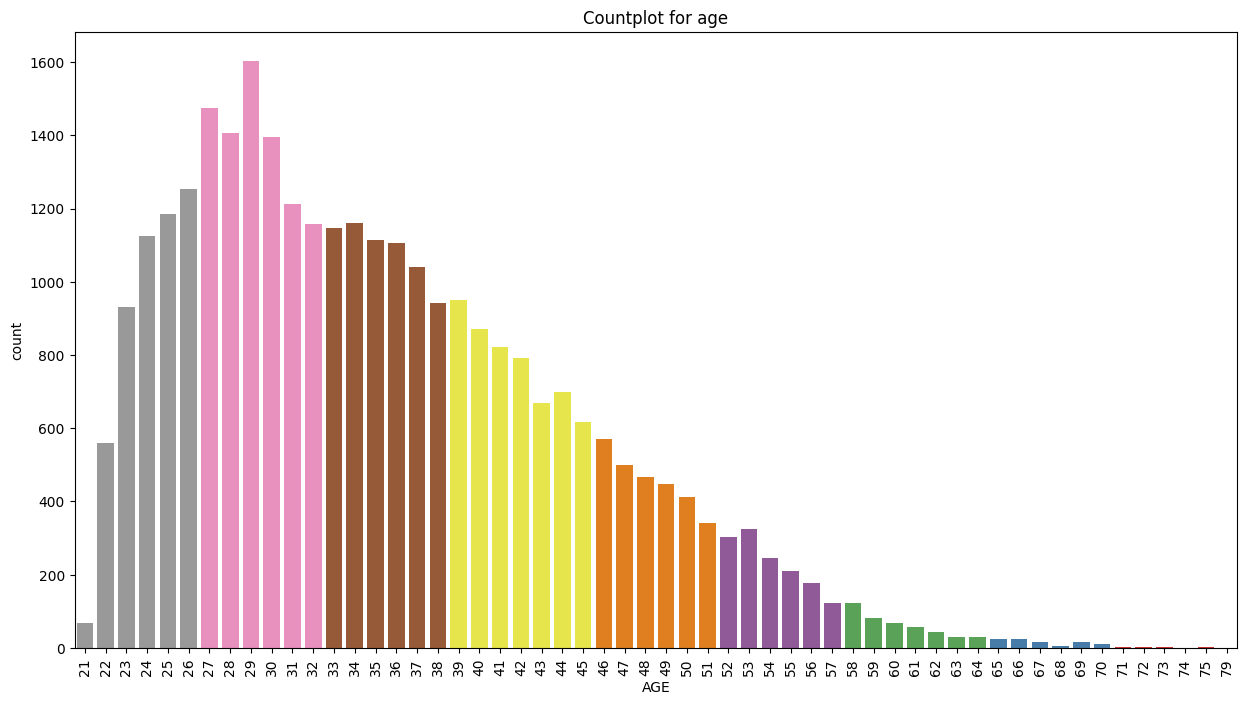

In [162]:
plt.figure(figsize=(15,8))
sns.countplot(x='AGE',data = df,palette="Set1_r")
plt.xticks(rotation =90)
plt.title('Countplot for age')             
plt.show()

In [163]:
defaults_by_gender = df.groupby('SEX')['default payment next month'].sum()



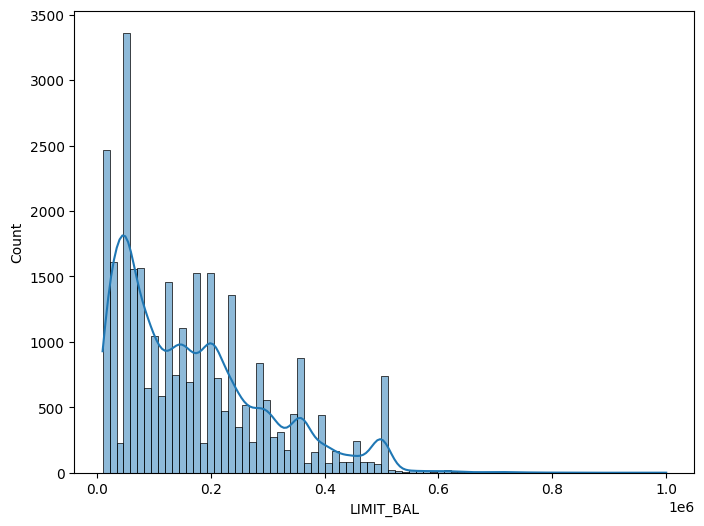

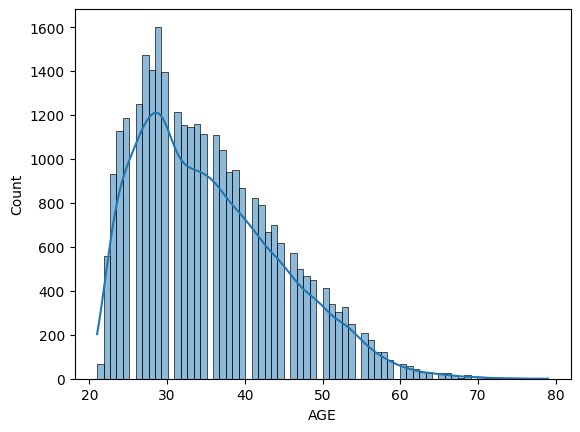

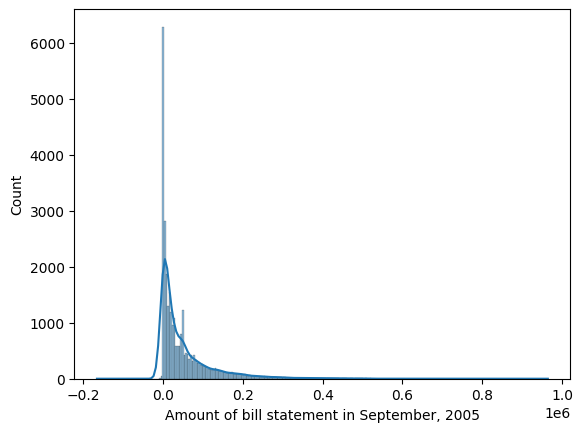

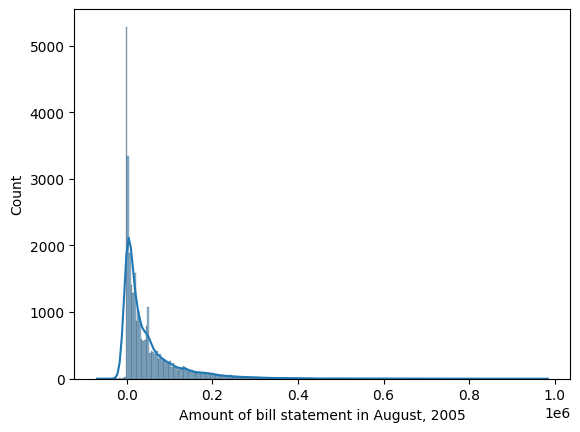

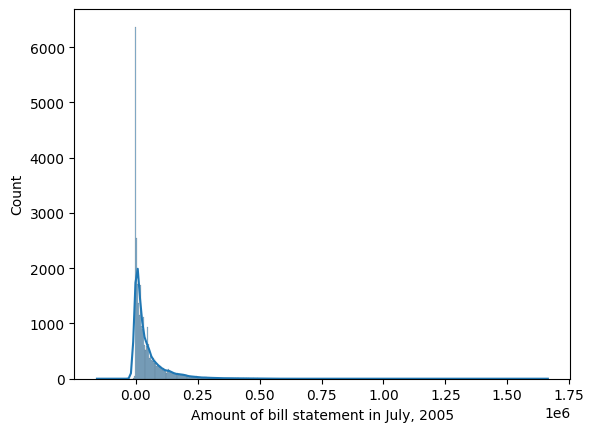

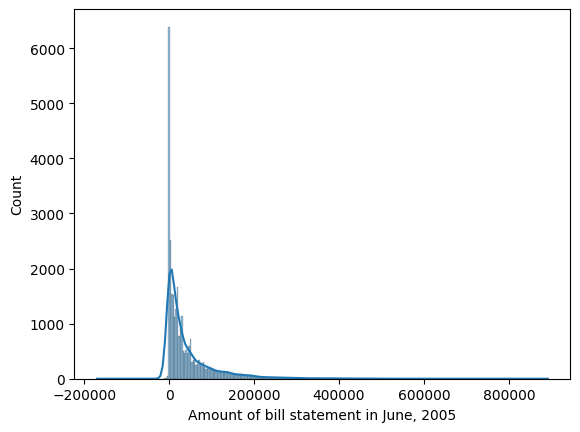

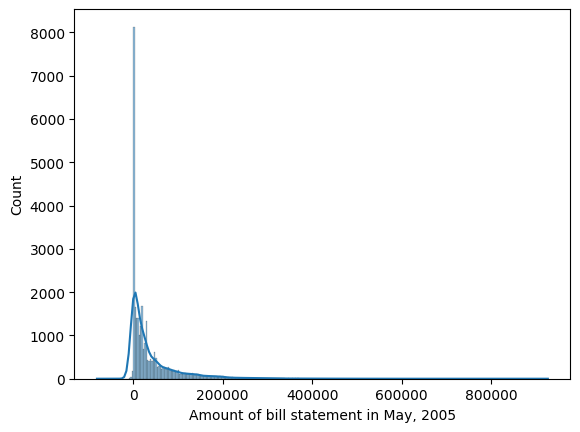

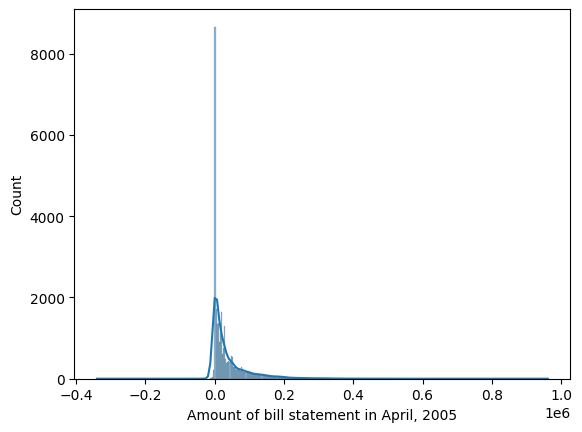

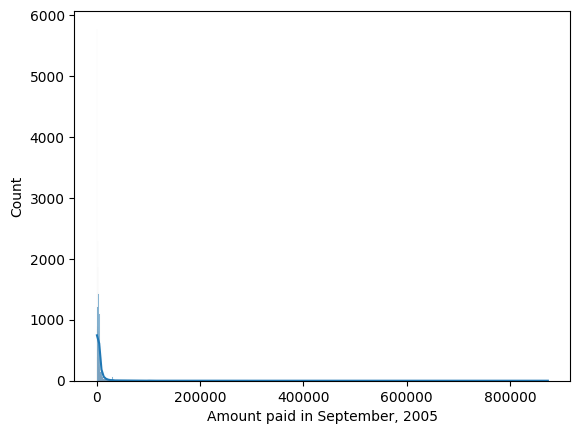

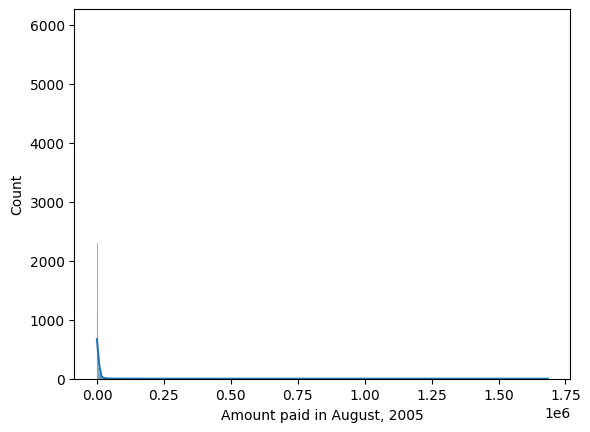

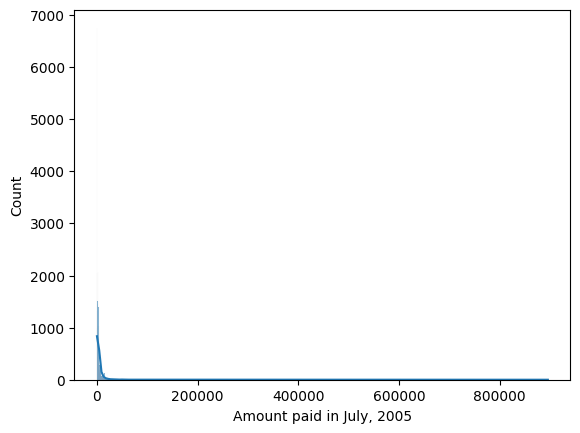

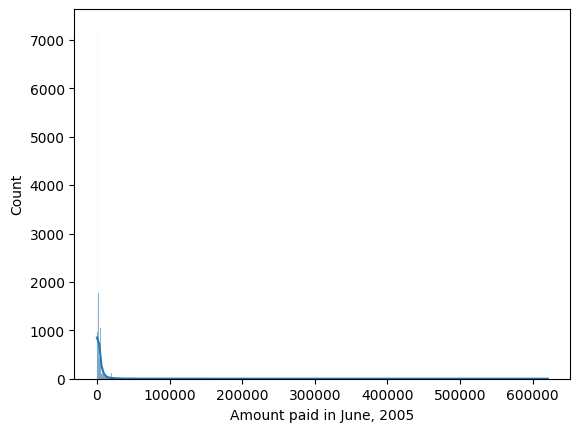

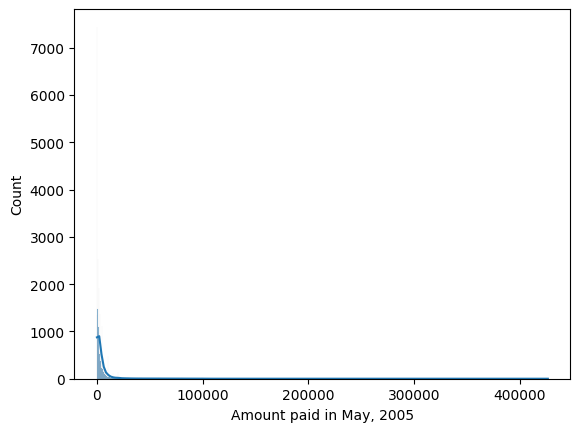

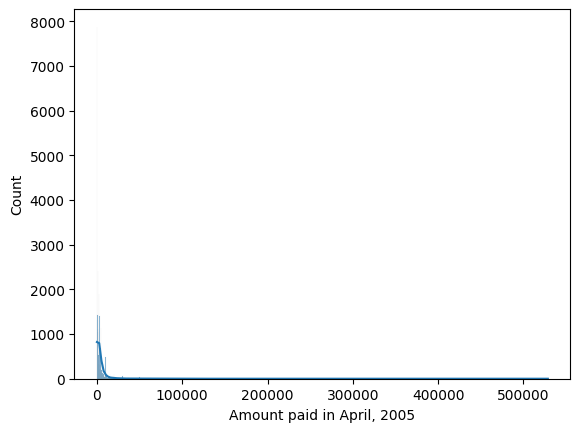

In [164]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_features:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

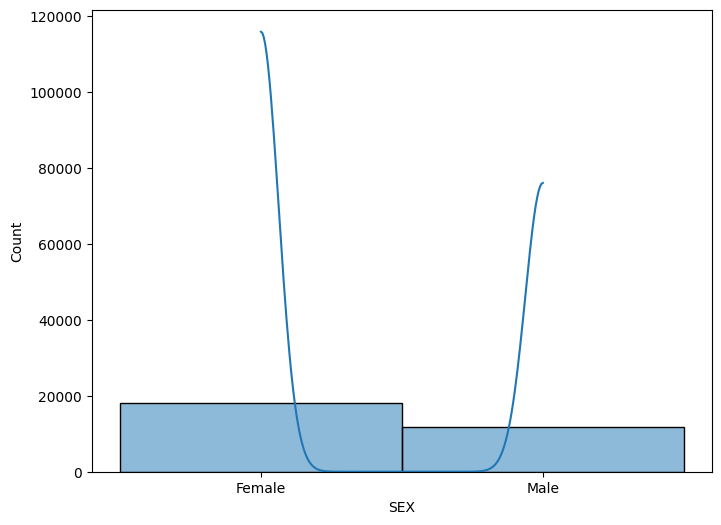

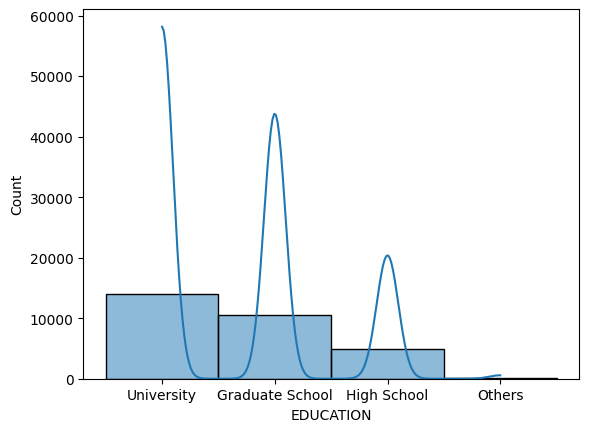

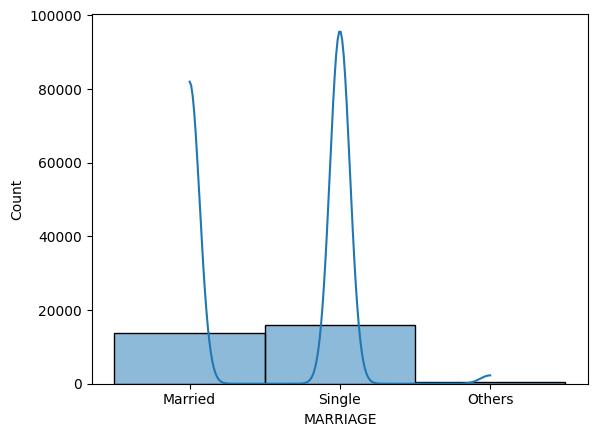

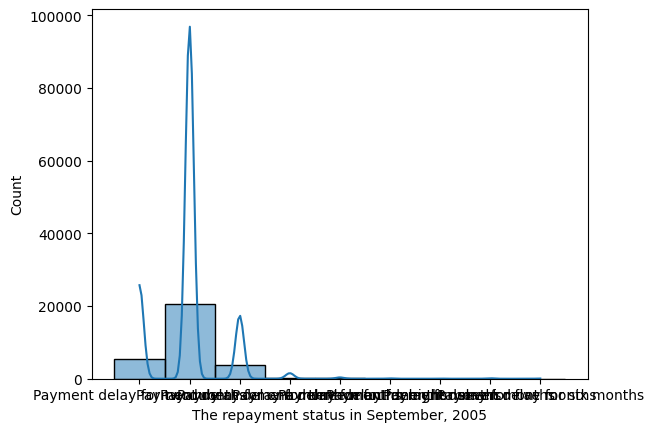

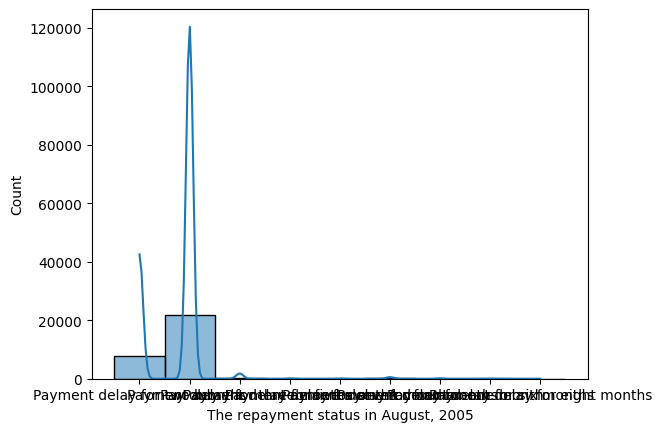

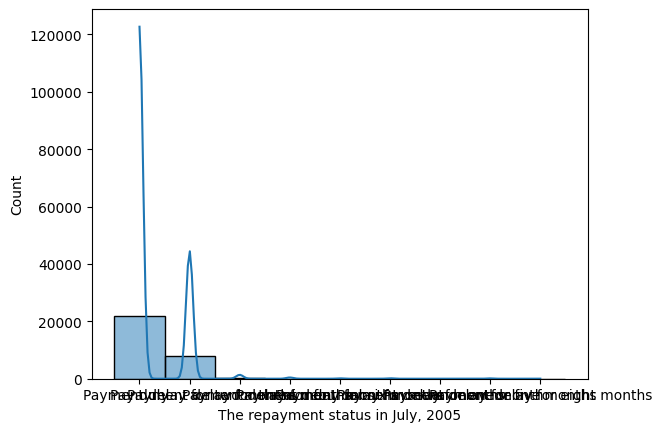

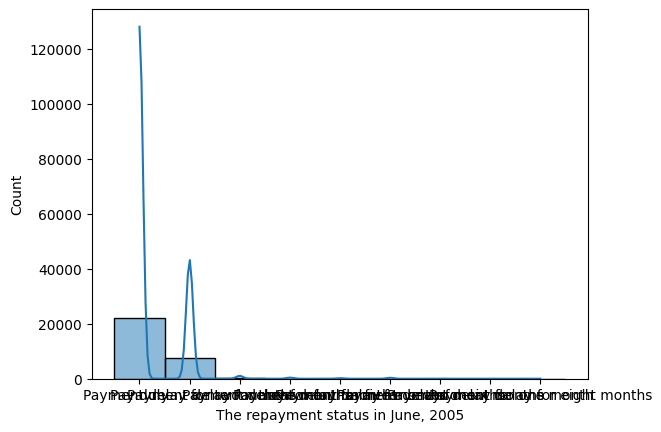

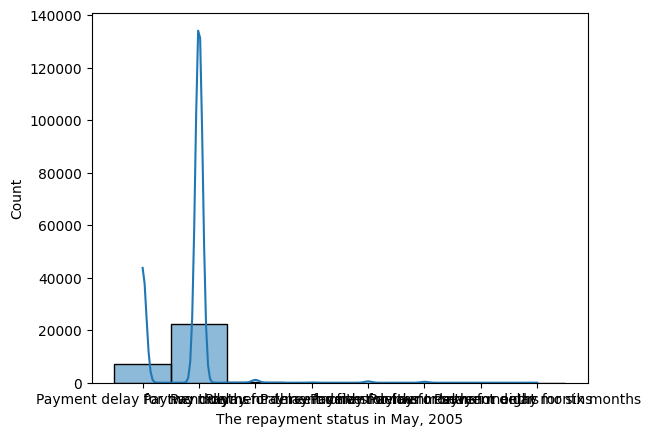

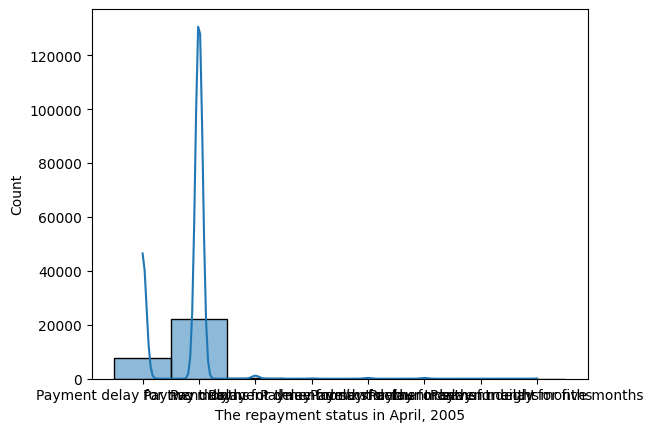

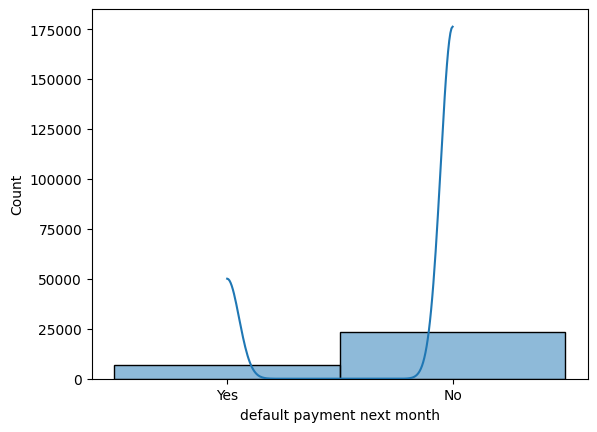

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in categorical_features:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   LIMIT_BAL                                    29965 non-null  int32 
 1   SEX                                          29965 non-null  object
 2   EDUCATION                                    29634 non-null  object
 3   MARRIAGE                                     29965 non-null  object
 4   AGE                                          29965 non-null  int32 
 5   The repayment status in September, 2005      29965 non-null  object
 6   The repayment status in August, 2005         29965 non-null  object
 7   The repayment status in July, 2005           29965 non-null  object
 8   The repayment status in June, 2005           29965 non-null  object
 9   The repayment status in May, 2005            29965 non-null  object
 10  The repaym